# Ground Balance Planning

* Initial sync options:
    - Initially wait a short time after starting transmission so the rx wave is being received properly
    - Wait for first high or low value within a period's worth of samples, compare which is bigger to test which peak you've hit
    - Wait for the zero crossing then look at sign or slope
    - Do this while in the air?  Or on the ground then use it as reference for ground balance, since already ~90 deg off?
    - Maybe do phase offsets to the tx wave, possible to do in higher precision then downsample before outputting for fine phase adjustments
* Phase testing:
    - Test that phases for various metal types actually are relative to the ground:
        + Do the ground balance offset, then test metal types with phasor graph


## Expected Waveforms

Text(0.5, 1.0, 'Phase Relationships for Ground Balance and Discrimination')

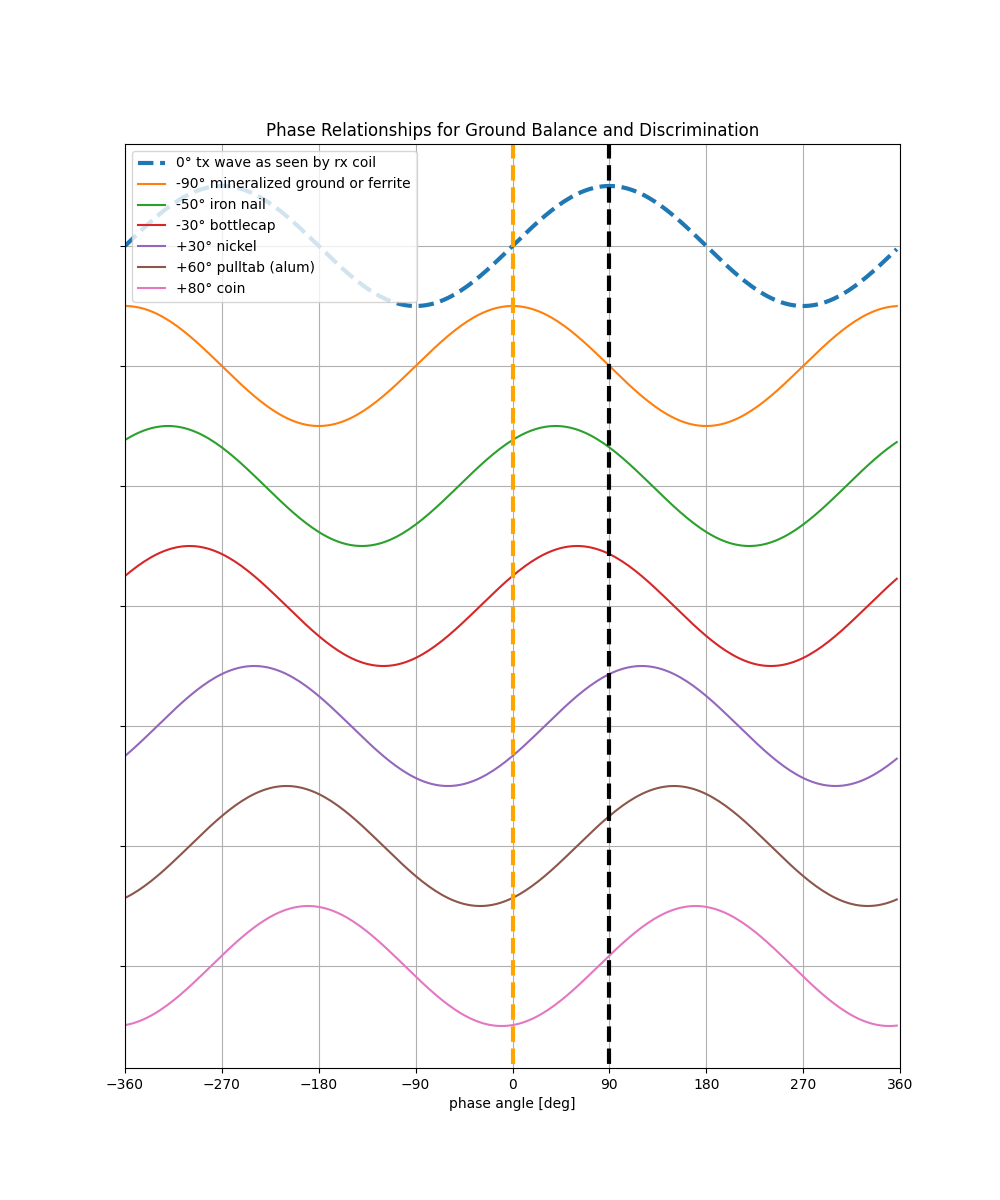

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sampleRate = 1920000
frequency = 16000
samplesToPlot = 2 * sampleRate * 1/frequency
x = np.arange(0, samplesToPlot) * 1/sampleRate * frequency * 360 - 360
degs = u'\N{DEGREE SIGN}'
fig = plt.figure()
plt.plot(x, np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + 0), "--", linewidth=3, label="0" + degs + " tx wave as seen by rx coil")
plt.plot(x, -2 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(90)), label="-90" + degs + " mineralized ground or ferrite")
plt.plot(x, -4 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(50)), label="-50" + degs + " iron nail")
plt.plot(x, -6 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(30)), label="-30" + degs + " bottlecap")
plt.plot(x, -8 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(-30)), label="+30" + degs + " nickel")
plt.plot(x, -10 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(-60)), label="+60" + degs + " pulltab (alum)")
plt.plot(x, -12 + np.sin(math.pi*2*frequency/sampleRate * np.arange(0, samplesToPlot) + math.radians(-80)), label="+80" + degs + " coin")
plt.grid(visible='true', which='major', axis='both')
plt.legend(loc='upper left')
plt.xlabel('phase angle [deg]')
#plt.ylabel('sin(x) at various phase offsets')
plt.axis('tight')
plt.gca().set_xlim([0, 360])
plt.gca().set_yticklabels([])
plt.xticks(np.arange(-360, 360+1, 90))
plt.vlines([0, 90], -14, 2, linestyles='dashed', linewidths=3, colors=['orange', 'black'])
plt.title("Phase Relationships for Ground Balance and Discrimination")